| <h1> Hands-on Activity 4.1 </h1> | <h1> Advanced Data Analytics and Machine Learning </h1> |
|--- | --- |
Name: Nicolas, Sean Julian S.<br>
Course and Section: CPE019S3 <br>
Instructor: Engr. Roman Richard
Date Performed: February 21, 2024
Date Submitted: February 23, 2024

<hr>







**PART 1: Do the following objectives**
1. Part 1: Import the Libraries and Data




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

titanic = pd.read_csv("titanic_train.csv")

In [2]:
titanic["Age"].fillna(titanic["Age"].mean(), inplace=True)

2. Part 2: Plot the Data


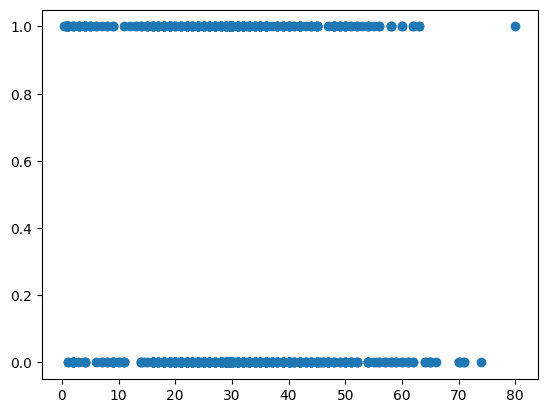

In [3]:
plt.scatter(titanic['Age'], titanic['Survived'])

3. Part 3: Perform Simple Linear Regression on the SURVIVAL feature column (you can check the internet on how you can perform simple linear regression)

In [4]:
model = LinearRegression()

In [5]:
x = titanic["Age"].values.reshape(-1,1)
y = titanic["Survived"].values.reshape(-1,1)

In [6]:
model.fit(x,y)
y_pred = model.predict(x)

<function matplotlib.pyplot.show(close=None, block=None)>

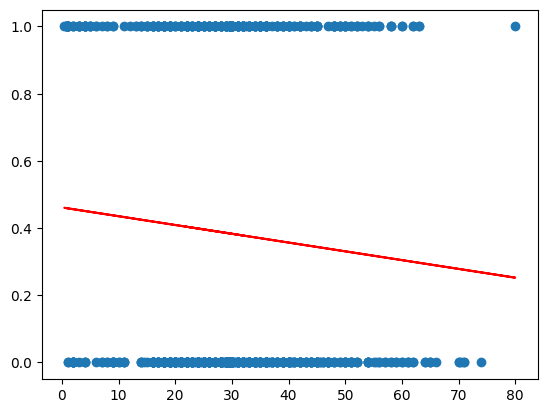

In [7]:
plt.scatter(x,y)
plt.plot(x,y_pred, color='red')
plt.show

#### Observation:
- Simple linear regression is not enough to provide a good visualization with the relation of variables to the survivability of the passengers in the titanic

<hr>

**PART 2: Perform the DECISION TREE classification activity**

Part 1: Create a Decision Tree Classifier
- In this part of the lab, you will create a decision tree classifier that will learn from a labelled dataset.
The dataset contains the names and demographic details for each passenger. In addition, details of the
passengers' trip are included. From this data, we can be build a decision tree that illustrates the factors that
contributed to survivability, or lack of it, for the voyage.
The datasets contain the following variables:

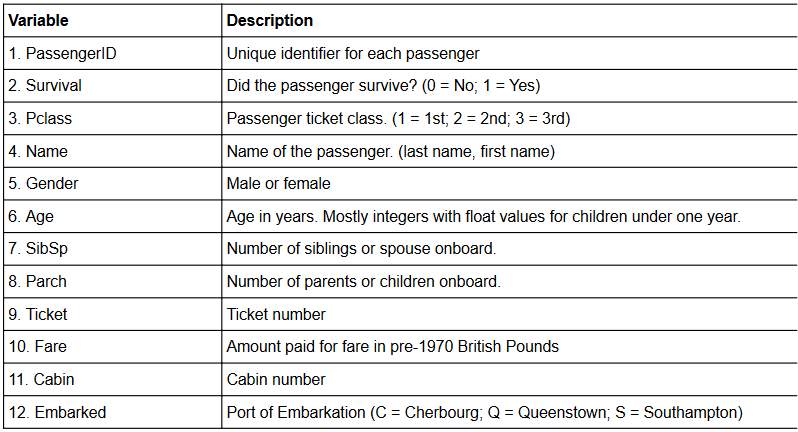

With the data above, what kinds of questions can we ask about the factors that contributed to passengers
surviving or perishing in the Titanic disaster?


- Did Age or Gender played a role in the survivability of the passengers in the Titanic
- What Age has the highest death count
- Did the type of Passenger ticket class affect the survivability of the passengers
- Do most passengers with the higher fair survived the Titanic

Step 1: Create the dataframe

a) Import pandas and the csv file
First, import pandas and create a dataframe from the Titanic training data set, which is stored in the titanic-
train.csv file. Use the pd.read_csv() method

In [8]:
#Code cell 1

#import pandas
import pandas as pd
#create a pandas dataframe called "training" from the titanic-train.csv file
training = pd.read_csv("titanic_train.csv")

b) Verify the import and take a look at the data.

In [9]:
#Code cell 2
#verify the contents of the training dataframe using the pandas info() method.
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Are there missing values in the data set?

- There are 177 missing values in the Age column

In [10]:
#Code cell 3
#view the first few rows of the data
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Step 2: Prepare the Data for the Decision Tree Model.

a) Replace string data with numeric labels

We will use scikit-learn to create the decision trees. The decision tree model we will be using can only handle
numeric data. The values for the Gender variable must be transformed into numeric representations. 0 will be
used to represent "male" and 1 will represent "female."
In this code, a lambda expression is used with the apply() dataframe method.

 This lambda expression
represents a function that uses a conditional statement to replace the text values in the columns with the
appropriate numeric value. The lambda statement can be interpreted as "if the parameter toLabel equals 'male',
return 0, if the value is something else, return 1." The apply() method will execute this function on the values in
every row of the "Gender" column of the dataframe.

In [11]:
#code cell 4
training["Sex"] = training["Sex"].apply(lambda toLabel: 0 if toLabel =='male' else 1)

b) Verify that the Gender variable has been changed.
The output should show values of 0 or 1 for the Gender variable in the dataset.

In [12]:
#code cell 5
#view the first few rows of the data again
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


c) Address Missing Values in the Dataset

The output of the info() method above indicated that about 180 observations are missing the age value. The age
value is important to our analysis. We must address these missing values in some way. While not ideal, we can
replace these missing age values with the mean of the ages for the entire dataset.

This is done by using the fillna() method on the "Age" column in the dataset. The fillna() method will
change the original dataframe by using the inplace = True argument.

In [13]:
#code cell 6
training["Age"].fillna(training["Age"].mean(), inplace=True)

d) Verify that the values have been replaced.

In [14]:
#code cell 7
#verify that the missing values for the age variable have been eliminated.
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


What is the value that was used to replace the missing ages?

In [15]:
#use code to answer the question above
print(training["Age"].mean())

29.69911764705882


Step 3: Train and Score the Decision Tree Model.

a) Create an array object with the variable that will be the target for the model.
The purpose of the model is to classify passengers as survivors or victims. The dataset identifies survivors and
victims. The model will learn which input variable values are most likely to belong to victims and survivors, and
then use that information to classify passengers from a unique test data set.

In [16]:
#code cell 8
#create the array for the target values
y_target = training["Survived"].values

b) Create an array of the values that will be the input for the model.

Only some of the features of the data are useful for creating the classifier tree. We create a list of the columns
from the data that we want the classifier to use as the input variables and then create an array using the column
name from that variable. The variable X_input holds the values for all the features that the model will use to
learn how to make the classifications. After the model is trained, we will use this variable to assign these labels
to the test data set.

In [17]:
#code cell 9
columns = ["Fare", "Pclass", "Sex", "Age", "SibSp"]
#create the variable to hold the features that the classifier will use
X_input = training[list(columns)].values

c) Create the learned model.

Import the decision tree module from the sklearn machine learning library. Create the classifier object
clf_train. Then, use the fit() method of the classifier object, with the X_input and y_target variables as
parameters, to train the model.

In [18]:
#code cell 10
#import the tree module from the sklearn library
from sklearn import tree
#create clf_train as a decision tree classifier object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
#train the model using the fit() method of the decision tree object.
#Supply the method with the input variable X_input and the target variable y_target
clf_train = clf_train.fit(X_input, y_target)

d) Evaluate the model

Use the score() method of the decision tree object to display the percentage accuracy of the assignments
made by the classifier. It takes the input and target variables as arguments

In [19]:
#code cell 11
clf_train.score(X_input,y_target)

0.8226711560044894

This score value indicates that classifications made by the model should be correct approximately 82% of the
time.

Step 6: Visualize the Tree

a) Create the intermediate file output
Import the sklearn.externals.six StringIO module which is used to output the characteristics of the
decision tree to a file. We will create a Graphviz dot file which will allow us to export the results of the classifier
into a format that can be converted into a graphic.

In [20]:
#code cell 12
from six import StringIO
with open("titanic.dot", 'w') as f:
  f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns)

b) Install Graphviz

To visualize the decision tree, Graphviz needs to be installed from a terminal. The installation requires that a
prompt be answered, which can't be done from a notebook code cell. Use the apt-get install graphviz
command from the terminal command line to install this software.

c) Convert the intermediate file to a graphic

The dot file that was created above can be converted to a .png file with the graphiz dot renderer. This is a shell
command, so use ! before it to run it from this noteblook. The new titanic.png graphic file should appear in the
directory that contains this notebook.

In [21]:
#code cell 13
#run the Graphviz dot command to convert the .dot file to .png
!dot -Tpng titanic.dot -o titanic.png

d) Display the image

Now we will import the Image module from the IPython.display library. This will allow us to open and display
an external graphics file on the notebook page. The Image function is used to display the file, with the .png file
name as argument.

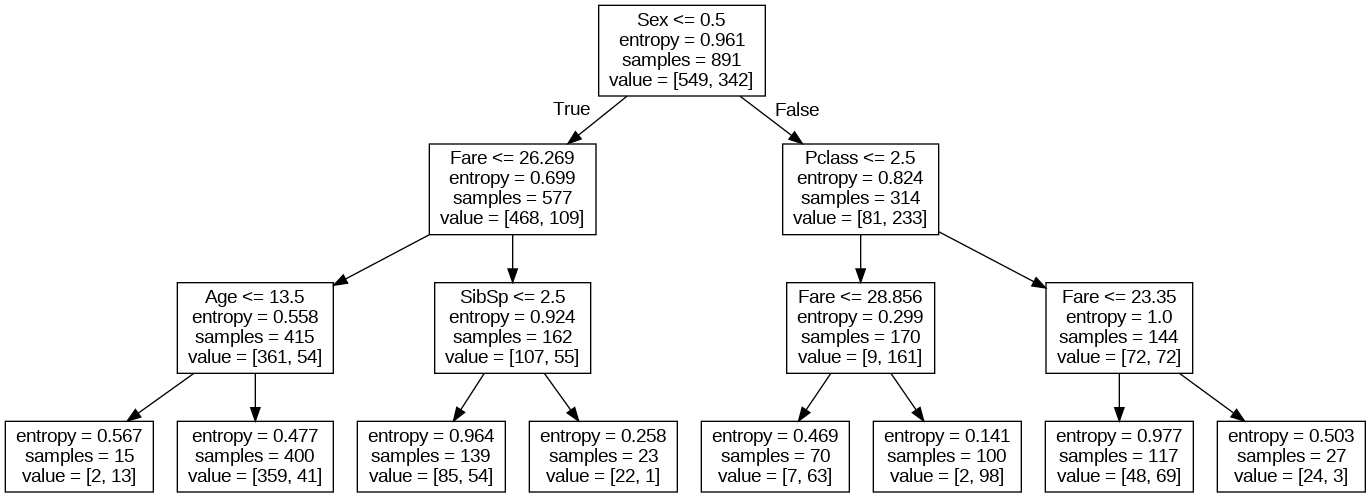

In [22]:
#code cell 14
#import the Image module from the Ipython.display libary
from IPython.display import Image
#display the decison tree graphic
Image("titanic.png")

e) Interpret the tree

From the tree, we can see several things. First, at the root of the tree is the Gender variable, indicating that it is
the single most important factor in making the classification. The branches to the left are for Gender = 0 or male.
Each root and intermediate node contains the decision factor, the entropy, and the number of passengers who fit
the critierion at that point in the tree. For example, the root node indicates that there are 891 observations that
make up the learning data set. At the next level, we can see that 577 people were male, and 314 were female. In
the third level, at the far right, we can see that 415 people were male and paid a fare of less than 26.2686.

Finally, the leaf nodes for that intermediate node indicate that 15 of these passengers were below the age of
13.5, and the other 400 were older than that age.
Finally, the elements in the value array indicate survival. The first value is the number of people who died, and
the second is the number of survivors for each criterion. The root node tells us that out of our sample, 549
people died and 342 survived.

Entropy is a measure of noise in the decision. Noise can be viewed as uncertainty. For example, in nodes in
which the decision results in equal values in the survival value array, the entropy is at its highest possible value,
which is 1.0. This means that the model was unable to definitively make the classification decision based on the
input variables. For values of very low entropy, the decision was much more clear cut, and the difference in the
number of survivors and victims is much higher.

What describes the group that had the most deaths by number? Which group had the most survivors?

- _Male Passengers with the Age <=13.5 has the highest number of death count_
- _Female Passengers with a Fare >=28.856 has the highest number of survivor count_

**Part 2: Apply the Decision Tree Model**

In this part of the lab, we will use the results of the learned decision tree model to label an unlabelled dataset of
Titanic passengers. The decision tree will evaluate the features of each observation and label the observation as
survived (label = 1) or died (label = 0).

Step 1: Import and Prepare the Data

In this step, you will import and prepare the data for analysis.

a) Import the data.

Name the dataframe "testing" and import the file titanic-test.csv.

In [45]:
#code cell 15
#import the file into the 'testing' dataframe.
testing = pd.read_csv("titanic_test.csv")

In [46]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


How many records are in the data set?

- 418

Which important variables(s) are missing values and how many are missing?

- Age is missing 86 entries
- Age is missing 1 entry

b) Use a lambda expression to replace the "male" and "female" values with 0 for male and 1 for
female..

In [24]:
#code cell 16
#replace the Gender labels in the testing dataframe
#code cell 4
testing["Sex"] = testing["Sex"].apply(lambda toLabel: 0 if toLabel =='male' else 1)

c) Replace the missing age values with the mean of the ages.

In [25]:
#code cell 17
#Use the fillna method of the testing dataframe column "Age"
#to replace missing values with the mean of the age values.
testing["Age"].fillna(testing["Age"].mean(), inplace=True)
testing["Fare"].fillna(testing["Fare"].mean(), inplace=True)

d) Verify that the values have been replaced.

Check that the missing values have been filled and that the Gender labels are 0 and 1.

In [26]:
#code cell 18
#verify the data preparation steps. Enter and run both the info and head
testing.info()
testing.head()
#methods from here, by entering and running one and then the other.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S


Step 2: Label the testing dataset

In this step, you will apply the learned model to the testing dataset.

a) Create the array of input variables from the testing data set.

In [27]:
#code cell 19
#create the variable X_input to hold the features that the classifier will use
X_input = testing[list(columns)].values

b) Apply the model to the testing data set.

Use the predict() method of the clf_train object that was trained to label the observations in the testing data
set with the most likely survival classification. Provide the array of input variables from the testing data set as the
parameter for this method.

In [28]:
#code cell 20
#apply the model to the testing data and store the result in a pandas dataframe.
#Use X_input as the argurment for the predict() method of the clf_train classifier object
target_labels = clf_train.predict(X_input)
#convert the target array into a pandas dataframe using the pd.DataFrame() method and target as argument
target_labels = pd.DataFrame({'Est_Survival':target_labels, 'Name':testing['Name']})
#display the first few rows of the data set

c) Evaluate the accuracy of the estimated labels

The ground truth for the survival of each passenger can be found in another file called all_data.csv. To select
only the passengers contained in the testing dataset, we merge the target_labels dataframe and the
all_data dataframe on the field Name. We then compare the estimated label with the ground truth dataframe
and compute the accuracy of the learned model.

In [101]:
#code cell 21
#import the numpy library as np
import numpy as np
# Load data for all passengers in the variable all_data
all_data = pd.read_csv("titanic_all.csv")
# Merging using the field Name as key, selects only the rows of the two datasets that refer to the same passenger
testing_results = pd.merge(target_labels, all_data[['Name','Survived']], on=['Name'])
# Compute the accuracy as a ratio of matching observations to total osbervations. Store this in in the variable acc.
acc = np.sum(testing_results['Est_Survival'] == testing_results['Survived']) /float(len(testing_results))
# Print the result
print(acc)

0.7682619647355163


Part 3: Evaluate the Decision Tree Model

The sklearn library includes a module that can be used to evaluate the accurracy of the decision tree model.
The train_test_split() method will divide the observations in whole data set into two randomly selected
arrays of observations that makeup the testing and training datasets. After fitting the model to the training data,
the trained model can be scored and the prediction accurracy compared for both the training and test datasets. It
is desirable for the two scores to be close, but the accuracy for the test dataset is normally lower that for the
training data set.

Step 1: Import the data

This time we will import the data from a csv file, but we will specify the columns that we want to have appear in
the dataframe. We will do this by passing an array-like list of column names to the read_csv() method usecols
parameter. Use the following columns: 'Survived', 'Fare', 'Pclass', 'Gender', 'Age', and 'SibSP'. Each should be in
quotes and the list should be square brackets. Name this dataframe all_data.

In [30]:
#code cell 22
#import the titanic_all.csv file into a dataframe called all_data. Specify the list of columns to import.
all_data = pd.read_csv("titanic_all.csv", usecols=['Survived','Pclass','Gender','Age','SibSp','Fare'])
#View info for the new dataframe

In [31]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1308 non-null   int64  
 1   Pclass    1308 non-null   int64  
 2   Gender    1308 non-null   object 
 3   Age       1045 non-null   float64
 4   SibSp     1308 non-null   int64  
 5   Fare      1308 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 61.4+ KB


In [32]:
all_data.rename(columns = {'Gender':'Sex'}, inplace = True)

How many records are in the data set?

- 1308 entries

Which important variables(s) are missing values and how many are missing?

- Age is missing 263 entries

Step 2: Prepare the data.

a) Remove the "male" and "female" strings and replace them with 0 and 1 respectively.

In [33]:
#code cell 23
#Label the gender variable with 0 and 1
all_data["Sex"] = all_data["Sex"].apply(lambda toLabel: 0 if toLabel =='male' else 1)

c) Replace the missing age values with the mean of the age of all members of the data set.

In [34]:
#code cell 24
#replace missing Age values with the mean age
all_data["Age"].fillna(all_data["Age"].mean(), inplace=True)
#display the first few rows of the data set
all_data.head()

,Survived,Pclass,Sex,Age,SibSp,Fare
0,1,1,1,29.0000,0,211.3375
1,1,1,0,0.9167,1,151.5500
2,0,1,1,2.0000,1,151.5500
3,0,1,0,30.0000,1,151.5500
4,0,1,1,25.0000,1,151.5500


Step 2: Create the input and output variables for the training and testing data.

The sklearn library includes modules that help with model selection. We will import from
sklearn.model_selection the train_test_split() method. This method will automatically split the entire
dataset, returning in total four numpy arrays, two for the features (test and validation) and two for the labels (test
and validation). One parameter of the method specifies the proportion of observations to use for testing and
training. Another parameter specifies a seed value that will be used to randomize assignment of the observation
to testing or training. This is used so that another user can replicate your work by receiving the same
assignments of observations to datasets. The syntax of the method is:

```train_test_split(input_X, target_y, test_size=0.4, random_state=0)```

40% of the data will be used for testing. The random seed is set to 0.
The method returns four values. These values are the input varibles for training and testing data and the target
variables for the training and testing data in that order.

a) Designate the input variables and output variables and generate the arrays.

In [35]:
#code cell 25
#Import train_test_split() from the sklearn.model_selection libary
from sklearn.model_selection import train_test_split
#create the input and target variables as uppercase X and lowercase y. Reuse the columns variable.
X = all_data[list(columns)].values
y = all_data["Survived"].values
#generate the four testing and training data arrays with the train_test_split() method
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.40, random_state=0)

b) Train the model and fit it to the testing data.
  
Now the model can be fit again. The model will be trained using only the training datat, as selected by the
train_test_split function.

In [36]:
#code cell 26
#create the training decision tree object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
#fit the training model using the input and target variables
clf_train = clf_train.fit(X_train, y_train)

c) Compare models by scoring each.

Use the score() method of each decision tree object to generate scores.

In [137]:
#code cell 27
#score the model on the two datasets and store the scores in variables. Convert the scores to strings using str()
train_score = str(clf_train.score(X_train,y_train))
test_score = str(clf_train.score(X_test,y_test))
#output the values in a test string
print('Training score = '+ train_score+' Testing score = '+test_score)

Training score = 0.8201530612244898 Testing score = 0.8053435114503816


We have now compared the scores for the trained model on both test and validation data. As expected, the test
accuracy score is close, but lower than the score for the training data. This is because normally, the model tends
to overfit the training data, therefore the test score is a better evaluation of how the model is able to generalize
outside of the training data.

Part 4 For Further Study (optional)

If you have the time and are interested, you could try the following and see how the decision tree is affected.

1. Remove observations with missing Age values.

Using a mean to replace missing age values may affect the accuracy of the model. One approach to this might
be to remove all observations with missing age values. Although this will decrease the size of the training
dataset, it could improve accuracy.



In [147]:
# Function to check accuracy when missing value are removed from the dataset


def removedNaAcc (datafile, columnNa):
  # read dataset and remove missing values
  dataset = pd.read_csv(datafile)
  dataset.dropna(subset=[columnNa], inplace=True)
  # set sex as numeric value so we can put it in the decisison tree
  dataset["Sex"] = dataset["Sex"].apply(lambda toLabel: 0 if toLabel =='male' else 1)

  # create variable that will be the target of the model
  y_target = dataset["Survived"].values

  # imput variables
  columns = ["Fare", "Pclass", "Sex", "Age", "SibSp"]
  X_input = dataset[list(columns)].values

  global clf_dataset
  clf_dataset = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

  # train model
  clf_dataset = clf_dataset.fit(X_input, y_target)

  # get accuracy
  score = clf_dataset.score(X_input,y_target)
  print("Percentage accuracy made by the classifier :" , score)

In [148]:
def applyModel (test_data, all_data):
  # import file and change Sex column to numeric value
  testing = pd.read_csv(test_data)
  testing["Sex"] = testing["Sex"].apply(lambda toLabel: 0 if toLabel =='male' else 1)
  # drop missing entries
  testing.dropna(subset=["Age", "Fare"], inplace=True)
  columns = ["Fare", "Pclass", "Sex", "Age", "SibSp"]
  X_input = testing[list(columns)].values
  target_labels = clf_dataset.predict(X_input)
  target_labels = pd.DataFrame({'Est_Survival':target_labels, 'Name':testing['Name']})

  all_data = pd.read_csv(all_data)
  testing_results = pd.merge(target_labels, all_data[['Name','Survived']], on=['Name'])
  #check accuracy
  acc = np.sum(testing_results['Est_Survival'] == testing_results['Survived']) /float(len(testing_results))
  print("Accuracy of learned model: " , acc)

In [145]:
def evaluate (alldata):
  # import dataset with the following columns
  all_data = pd.read_csv(alldata, usecols=['Survived','Pclass','Gender','Age','SibSp','Fare'])
  # rename column
  all_data.rename(columns = {'Gender':'Sex'}, inplace = True)
  # change sex to numeric value
  all_data["Sex"] = all_data["Sex"].apply(lambda toLabel: 0 if toLabel =='male' else 1)
  # drop missing entries
  all_data.dropna(subset=["Age"], inplace=True)
  X = all_data[list(columns)].values
  y = all_data["Survived"].values
  # split the data set
  X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.40, random_state=0)
  clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
  clf_train = clf_train.fit(X_train, y_train)
  # compare two scores
  train_score = str(clf_train.score(X_train,y_train))
  test_score = str(clf_train.score(X_test,y_test))
  print('Training score = '+ train_score+' Testing score = '+test_score)

In [149]:
# call function
removedNaAcc("titanic_train.csv", "Age")
applyModel("titanic_test.csv", "titanic_all.csv")
evaluate("titanic_all.csv")

Percentage accuracy made by the classifier : 0.8095238095238095
Accuracy of learned model:  0.774294670846395
Training score = 0.8070175438596491 Testing score = 0.7990430622009569


2. Remove the input variables.

Another issue with this type of analysis is the identification of which input variables, or features, are essential to
the accuracy of the classifier. One way to do this is to try running the classifier with different sets of input
variables by editing the list of variables that is used to fit the model.

In [158]:
# Function to specify input variable for the model
# Included dropping the NA values to have better accuracy

def specificInVars (datafile, columnNa, input_vars):
  # read dataset and remove missing values
  dataset = pd.read_csv(datafile)
  dataset.dropna(subset=[columnNa], inplace=True)

  # set sex as numeric value so we can put it in the decisison tree
  dataset["Sex"] = dataset["Sex"].apply(lambda toLabel: 0 if toLabel =='male' else 1)

  # create variable that will be the target of the model
  y_target = dataset["Survived"].values

  # specified input variables
  X_input = dataset[list(input_vars)].values

  global clf_dataset2
  clf_dataset2 = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

  # train model
  clf_dataset2 = clf_dataset2.fit(X_input, y_target)

  # get accuracy
  score = clf_dataset2.score(X_input,y_target)
  print("Percentage accuracy made by the classifier :" , score)

In [161]:
def applyModel2 (test_data, all_data, input_vars):
  # import dataset
  testing = pd.read_csv(test_data)
  testing["Sex"] = testing["Sex"].apply(lambda toLabel: 0 if toLabel =='male' else 1)
  testing.dropna(subset=["Age"], inplace=True)
  X_input = testing[list(input_vars)].values
  target_labels = clf_dataset2.predict(X_input)
  target_labels = pd.DataFrame({'Est_Survival':target_labels, 'Name':testing['Name']})

  all_data = pd.read_csv(all_data)
  testing_results = pd.merge(target_labels, all_data[['Name','Survived']], on=['Name'])
  acc = np.sum(testing_results['Est_Survival'] == testing_results['Survived']) /float(len(testing_results))
  print("Accuracy of learned model: " , acc)

In [173]:
def evaluate2 (alldata, input_vars):
  all_data = pd.read_csv(alldata, usecols=['Survived',"Gender","Age","SibSp"])
  all_data.rename(columns = {'Gender':'Sex'}, inplace = True)
  all_data["Sex"] = all_data["Sex"].apply(lambda toLabel: 0 if toLabel =='male' else 1)
  all_data.dropna(subset=["Age"], inplace=True)
  X = all_data[list(input_vars)].values
  y = all_data["Survived"].values
  X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.40, random_state=0)
  clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
  clf_train = clf_train.fit(X_train, y_train)
  train_score = str(clf_train.score(X_train,y_train))
  test_score = str(clf_train.score(X_test,y_test))
  print('Training score = '+ train_score+' Testing score = '+test_score)

In [174]:
# After trying the variables one by one, this combination provided the highest accuracy
variables = ["Sex", "Age", "SibSp"]
specificInVars("titanic_train.csv", "Age", variables)
applyModel2 ("titanic_test.csv", "titanic_all.csv", variables)
evaluate2 ("titanic_all.csv", variables)

Percentage accuracy made by the classifier : 0.8179271708683473
Accuracy of learned model:  0.7836990595611285
Training score = 0.8070175438596491 Testing score = 0.7990430622009569


**Conclusion**
- In this laboratory activity, I was able to perform decision tree classification from a dataset. I was also able to apply different functions to prepare the data from the dataset such as filling missing data in the dataset and rename columns. After performing a decision tree classification, I was able to apply the decision tree model and evaluate it. I was also able to dropping all of the NA valeus in the dataset to increase the accuracy of the model